# Intro to notebooks

Welcome to your first notebook.  A notebook is a mixture of text, code, and code output captured from a live connection to a running instance of an environment like a Python shell.

This is a text cell, using **markdown**.  It renders as nice clean HTML.

In [1]:
print "This is a python cell. It executes and its output renders below."

This is a python cell. It executes and its output renders below.


You can do most anything here that you could do in the Python REPL, indeed this is basically a web front-end to the Python REPL, or more precisely, to the [IPython](http://ipython.org/) REPL.  IPython is an enhanced wrapper around the standard Python REPL that's been around (and I've been using) for over ten years.

Note that the code cell above was numbered when it executed.  Adding another cell and executing it updates the number, leaving a train of execution order.

In [2]:
print "Running this cell next."

Running this cell next.


There are many nifty little hooks to do things like render remote images inline:

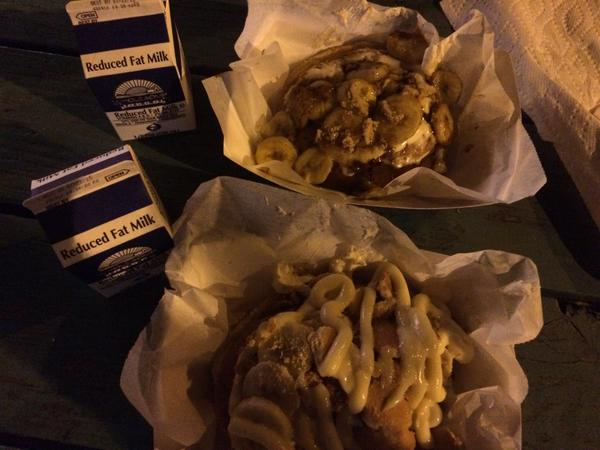

In [25]:
from IPython.display import Image
Image("https://pbs.twimg.com/media/CJsHH88UYAE0ewF.jpg")

And much, much more:

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo("aIXED26Wppg")

The markdown rendering includes support for [mathjax](http://mathjax.org/):

\begin{equation*}
P(E)   = {n \choose k} p^k (1-p)^{ n-k} 
\end{equation*}

Pretty cool, yeah?

## Try it out yourself:

The best way to learn is to give it a whirl.  If you have a machine, go to [jupyter.org](http://jupyter.org/) and click "try it in your browser".  

Really, try it now!

### How does it work?

Jupyter works by wrapping the shell environment in a Jupyter kernel, and communicating with the web front-end using a [messaging specification](http://jupyter-client.readthedocs.org/en/latest/messaging.html). The original notebook just used an IPython kernel, so it was originally known as the "IPython Notebook".  In the past few years the IPython folks received substantial funding to make the notebook more widely accessible, so they changed the name to Jupyter.  You might hear it referred to as IPython still, due to habit.

The message routing looks like this:

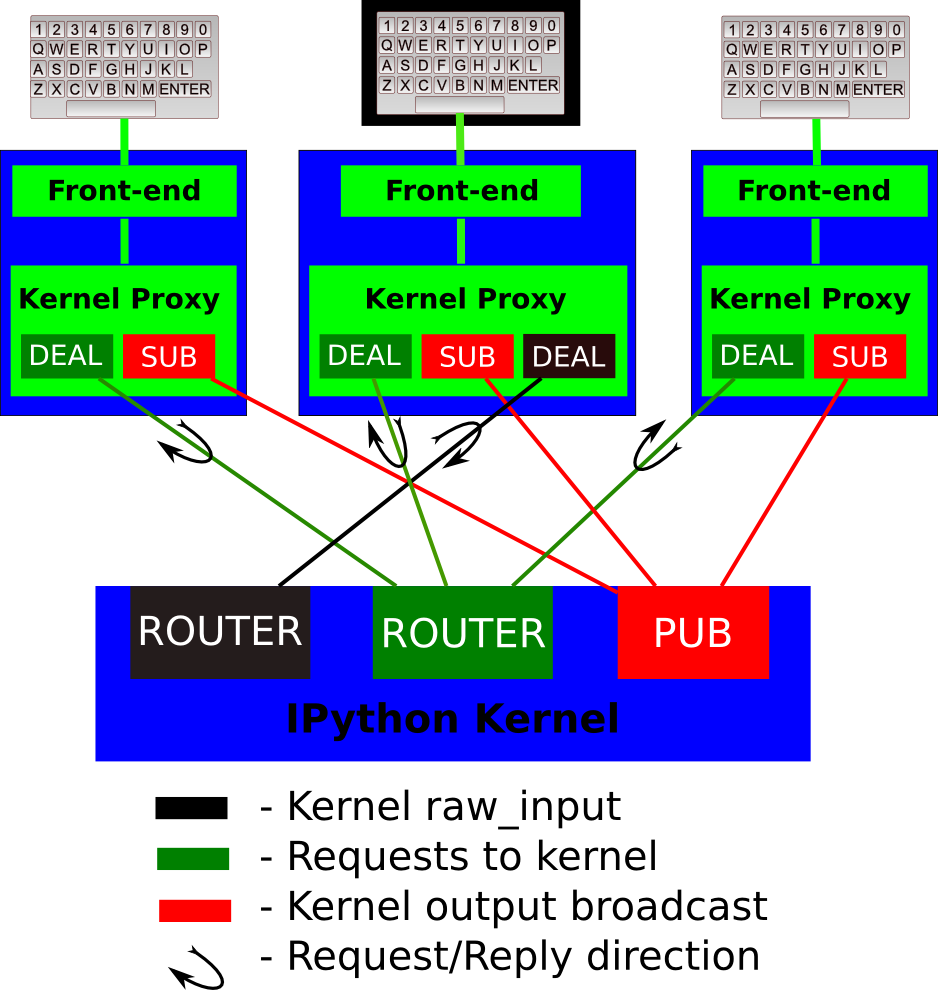

In [24]:
Image("http://jupyter-client.readthedocs.org/en/latest/_images/frontend-kernel.png")

Kernels exist [for many languages](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages).  This is extremely useful.

## Why is it important?

 * Mixing code and narrative is an effective and proven communication technique for many contexts (see also [literate programming](https://en.wikipedia.org/wiki/Literate_programming))
 * It is a good working environment for exploring and explain complex ideas requiring a mix of code, data, math, media, and text, easier and faster than raw HTML
 * Its openness creates many possibilities
 * It is a terrific teaching tool
 * It plays okay with version control, renders inline in Github
 * We can use it in our daily work (I have started to)

## Getting started

The notebook structure is similar to that offered by other statistical and mathematical packages like Stata or Mathematica.  It evolved from the IPython project, and is now known as [Jupyter](http://jupyter.org/).  It is a typical part of scientific work to record actions in some kind of lab notebook, and this modality flows naturally from that mindset - record what you do, share with others.

With that in mind, what do you need to get started?

In [32]:
%cat requirements.txt

ipython[notebook]
julia
matplotlib
pandas
rpy2


This is the minimal set of requirements I had to install in a virtualenv to work with this notebook.  The key one is ```ipython[notebook]```.  This brings in the IPython kernel (which you can then use on its own in the shell) along with all the other notebook dependencies, like pyzmq, tornado, jinja, and others.

The ```julia``` and ```rpy2``` libraries add Julia and R integration *within* an IPython kernel notebook (demo below).  ```matplotlib``` and ```pandas``` are typical libraries for data wrangling in Python (demo below).

Put simply, to use notebooks, all you have to do on a machine with a working Python environment is:

```
    % pip install ipython[notebook]
    [...many things install...]
    % ipython notebook
```

IPython will then use the ```webbrowser``` module to pop open a browser tab with a view to your working directory.  From there you can create notebooks, and you're off.  That's it!

## It's just like a Python shell

You can do pretty much whatever you'd do in python.

In [54]:
x = 5
y = 10
print x * y

50


In [55]:
!pip install requests

ERROR: Line magic function `%pip` not found.


## Interactive widgets

A recent development that offers a lot of potential in teaching/learning and exploring data is the use of interactive widgets to enable users to see more than just a static plot.  Widgets provide convenient UI controls that can be hooked up to other elements, such as a plot, to support dynamic updates.

Like a slider:

In [42]:
from IPython.html.widgets import *
%matplotlib inline

In [43]:
from IPython.display import display
slider = IntSlider()
display(slider)

In [44]:
slider.value

0

There is a whole range of widget types:

In [46]:
from IPython.html import widgets
[n for n in dir(widgets) if not n.endswith('Widget') and n[0] == n[0].upper() and not n[0] == '_']

['Accordion',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'Dropdown',
 'FlexBox',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'HBox',
 'HTML',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Latex',
 'Output',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'VBox']

## Working with other languages

If you look closely at the spelling of Jupyter, you might notice that it implies more than just Python.  Like, for instance, R:

In [8]:
%load_ext rmagic

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


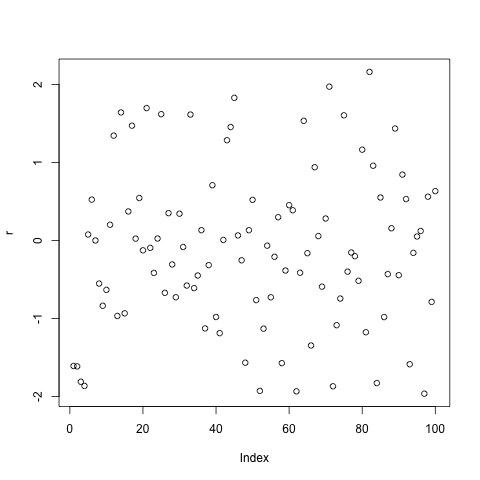

In [9]:
%%R
r <- rnorm(100)
plot(r)

...and Julia...

In [15]:
%load_ext julia.magic

The julia.magic extension is already loaded. To reload it, use:
  %reload_ext julia.magic


In [21]:
%%julia 
using DataFrames
df = DataFrame(x1=[1, 2], x2=["foo", "bar"])

<PyCall.jlwrap 2x2 DataFrame
| Row | x1 | x2    |
|-----|----|-------|
| 1   | 1  | "foo" |
| 2   | 2  | "bar" |>

Recall that this is a Python 2 kernel (see top right).  Because of this, we are using python dependencies for R and Julia integration.  Those are nifty tools in their own right - mixing data and logic among languages can have advantages.  More to the point, though, you could just as easily have an IJulia notebook, or an R notebook, or a bash notebook, etc., where the default execution is performed in that language, like it is for Python in this one.

You can even write HTML directly:

In [31]:
%%HTML 
<h3>Hi there</h3>

...which brings in all kinds of possibilities with javascript and more.

The list of other things you can mix in here is really quite long, this is just the tip of the iceberg.

## How can we use it?

 * Documenting our work for ourselves (e.g. via [https://github.com/gwu-libraries/notebooks](https://github.com/gwu-libraries/notebooks))
 * Publishing our work to others, even privately (e.g. via [https://github.com/gwu-libraries/notebooks-private](https://github.com/gwu-libraries/notebooks-private))
 * Teaching
 * Learning from others
 * Recording thoughts during experimental / exploratory phases of work